In [1]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Metody Numeryczne

## Równania liniowe – układy n równań z n niewiadomymi



### dr hab. inż. Jerzy Baranowski, Prof.AGH

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def normalize_vector(v):
    v=np.array(v)
    return v/np.linalg.norm(v)
import matplotlib as mpl
plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

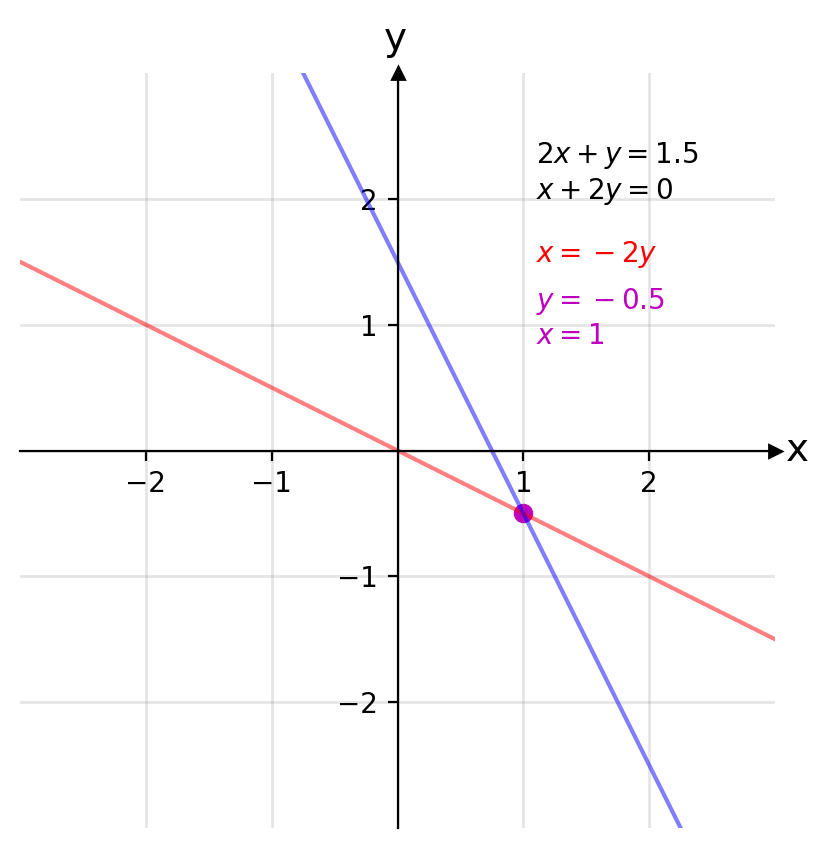

In [3]:


# Select length of axes and the space between tick labels
xmin, xmax, ymin, ymax = -2, 2, -2, 2
ticks_frequency = 1

# Plot points
fig_ukrow, ax = plt.subplots(figsize=(5, 5))
ax.scatter(1, -.5, c='m')

ax.plot([-3, 3], [1.5, -1.5], c='r', lw=1.5, alpha=0.5)
ax.plot([2.25, -.75], [-3, 3], c='b',  lw=1.5, alpha=0.5)

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

ax.text(1.1,2,'$2x+y = 1.5$\n$x+2y=0$')

ax.text(1.1,1.5,'$x = -2y$',c='r')

ax.text(1.1,.85,'$y=-0.5$\n$x=1$',c='m')


plt.show()

## Prosty układ równań liniowych

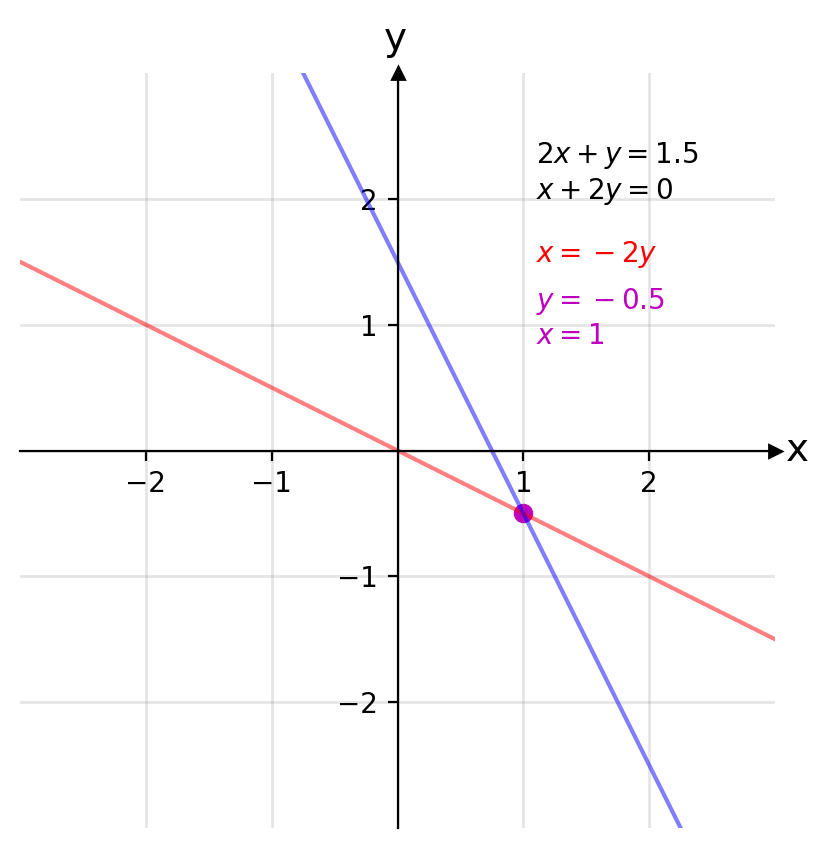

In [4]:
fig_ukrow

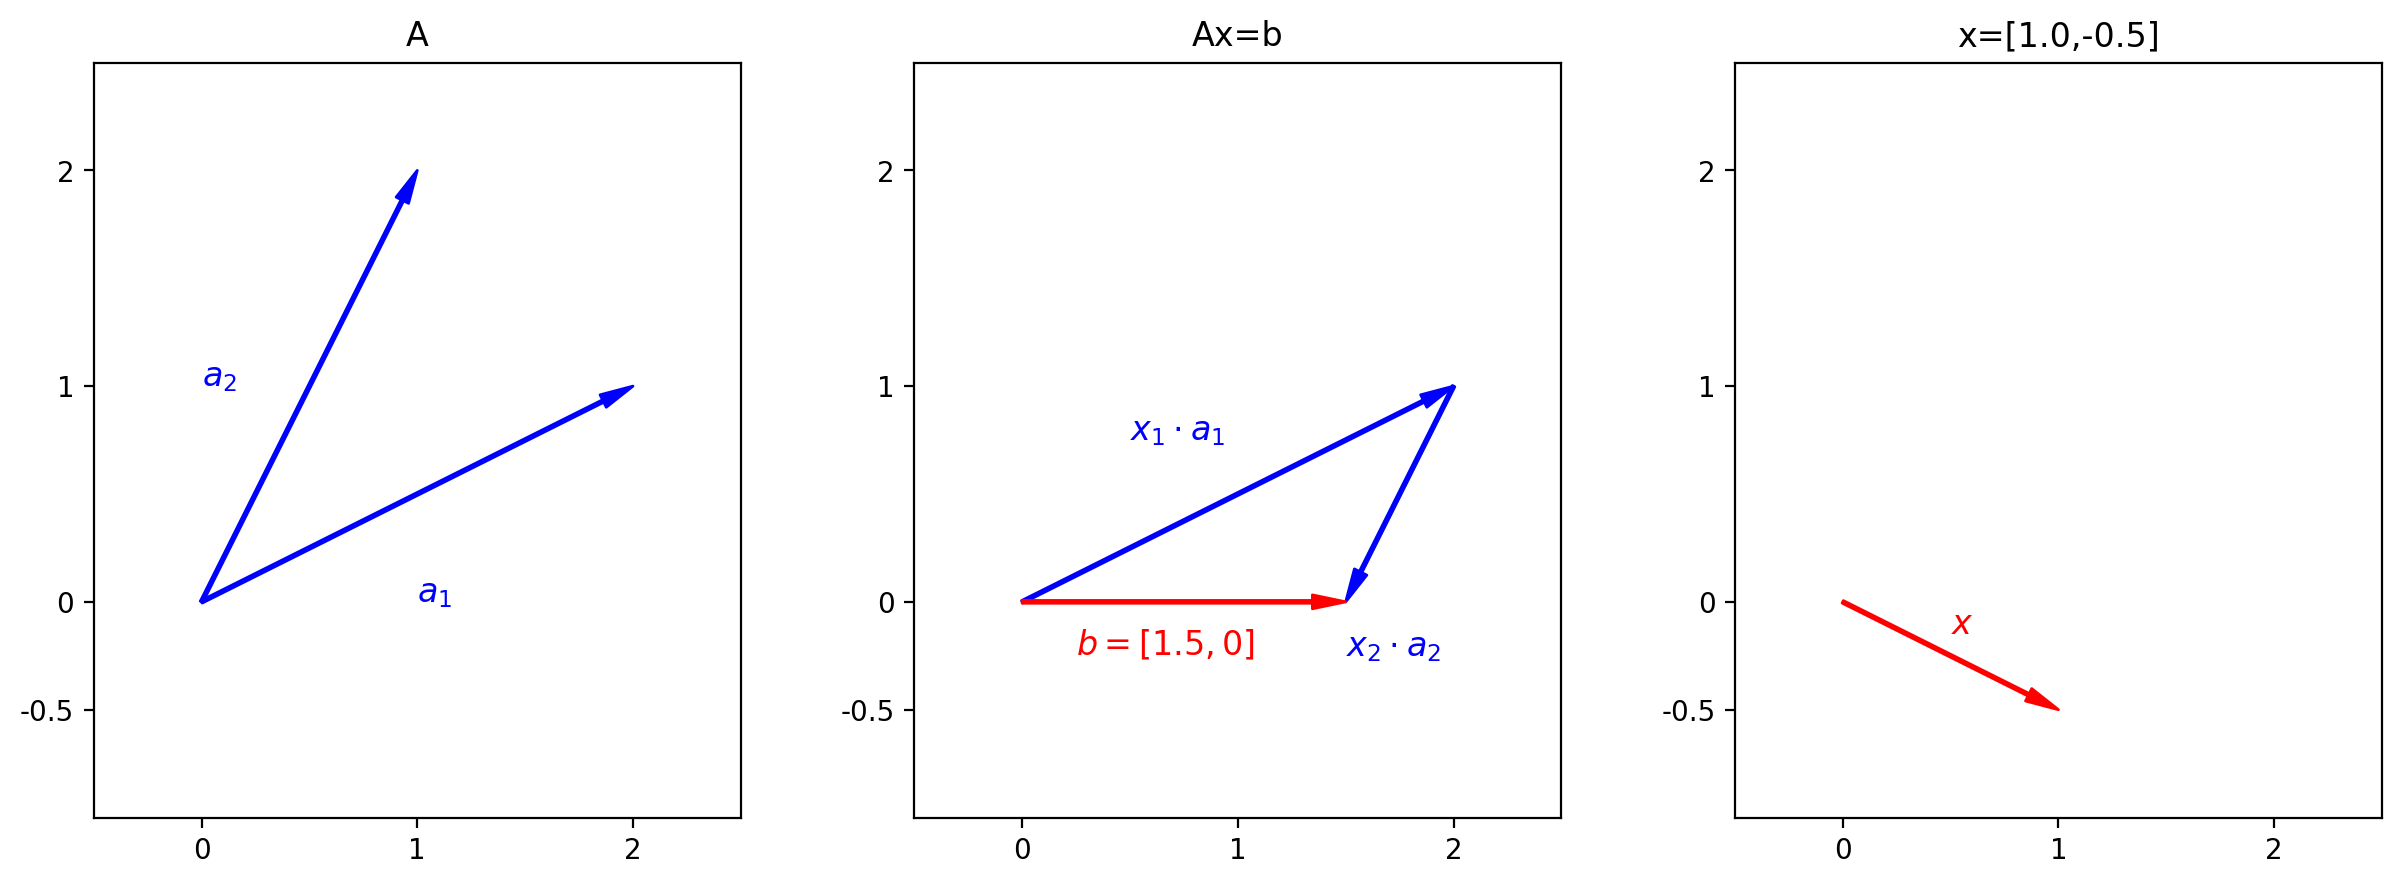

In [5]:
A=np.array([[2,1],[1,2]])
a1=tuple(A[:,0])
a2=tuple(A[:,1])
fig_vector,axes=plt.subplots(1,3,figsize=(15,5))
ax1=axes[0]
ax1.set_xlim([-.5,2.5])
ax1.set_ylim([-1,2.5])
ax1.set_aspect('equal')
ax1.annotate('',xytext=(0,0),xy=a1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax1.annotate('',xytext=(0,0),xy=a2,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax1.text(1,0,'$a_1$',c='blue',fontsize=12)
ax1.text(0,1,'$a_2$',c='blue',fontsize=12)
ax1.set_title('A',fontsize=12)
ax1.set_xticks([0,1,2])
ax1.set_yticks([-.5,0,1,2])
ax1.set_yticklabels(['-0.5','0','1','2'])

ax15=axes[2]
x=np.array([[1.],[-.5]])
ax15.set_xlim([-.5,2.5])
ax15.set_ylim([-1,2.5])
ax15.set_aspect('equal')
ax15.annotate('',xytext=(0,0),xy=tuple(x),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='red'))
ax15.text(0.5,-0.15,'$x$',c='red',fontsize=12)
ax15.set_title('x=[{first},{last}]'.format(first=x[0,0],last=x[1,0]),fontsize=12)
ax15.set_xticks([0,1,2])
ax15.set_yticks([-.5,0,1,2])
ax15.set_yticklabels(['-0.5','0','1','2'])


ax2=axes[1]
ax2.set_xlim([-.5,2.5])
ax2.set_ylim([-1,2.5])
ax2.set_aspect('equal')
ax2.annotate('',xytext=(0,0),xy=a1,arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.annotate('',xytext=a1,xy=tuple(A[:,0]-.5*A[:,1]),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='blue'))
ax2.annotate('',xytext=(0,0),xy=tuple(A@x),arrowprops=dict(width=1,headwidth=5, shrinkA = 0, shrinkB = 0,color='red'))
ax2.text(0.5,.75,'$x_1\cdot a_1$',c='blue',fontsize=12)
ax2.text(1.5,-0.25,'$x_2\cdot a_2$',c='blue',fontsize=12)
ax2.text(0.25,-0.25,'$b = [1.5, 0] $',c='red',fontsize=12)
ax2.set_title('Ax=b',fontsize=12)
ax2.set_xticks([0,1,2])
ax2.set_yticks([-.5,0,1,2])
ax2.set_yticklabels(['-0.5','0','1','2'])
plt.ioff()

## Interpretacja geometryczna

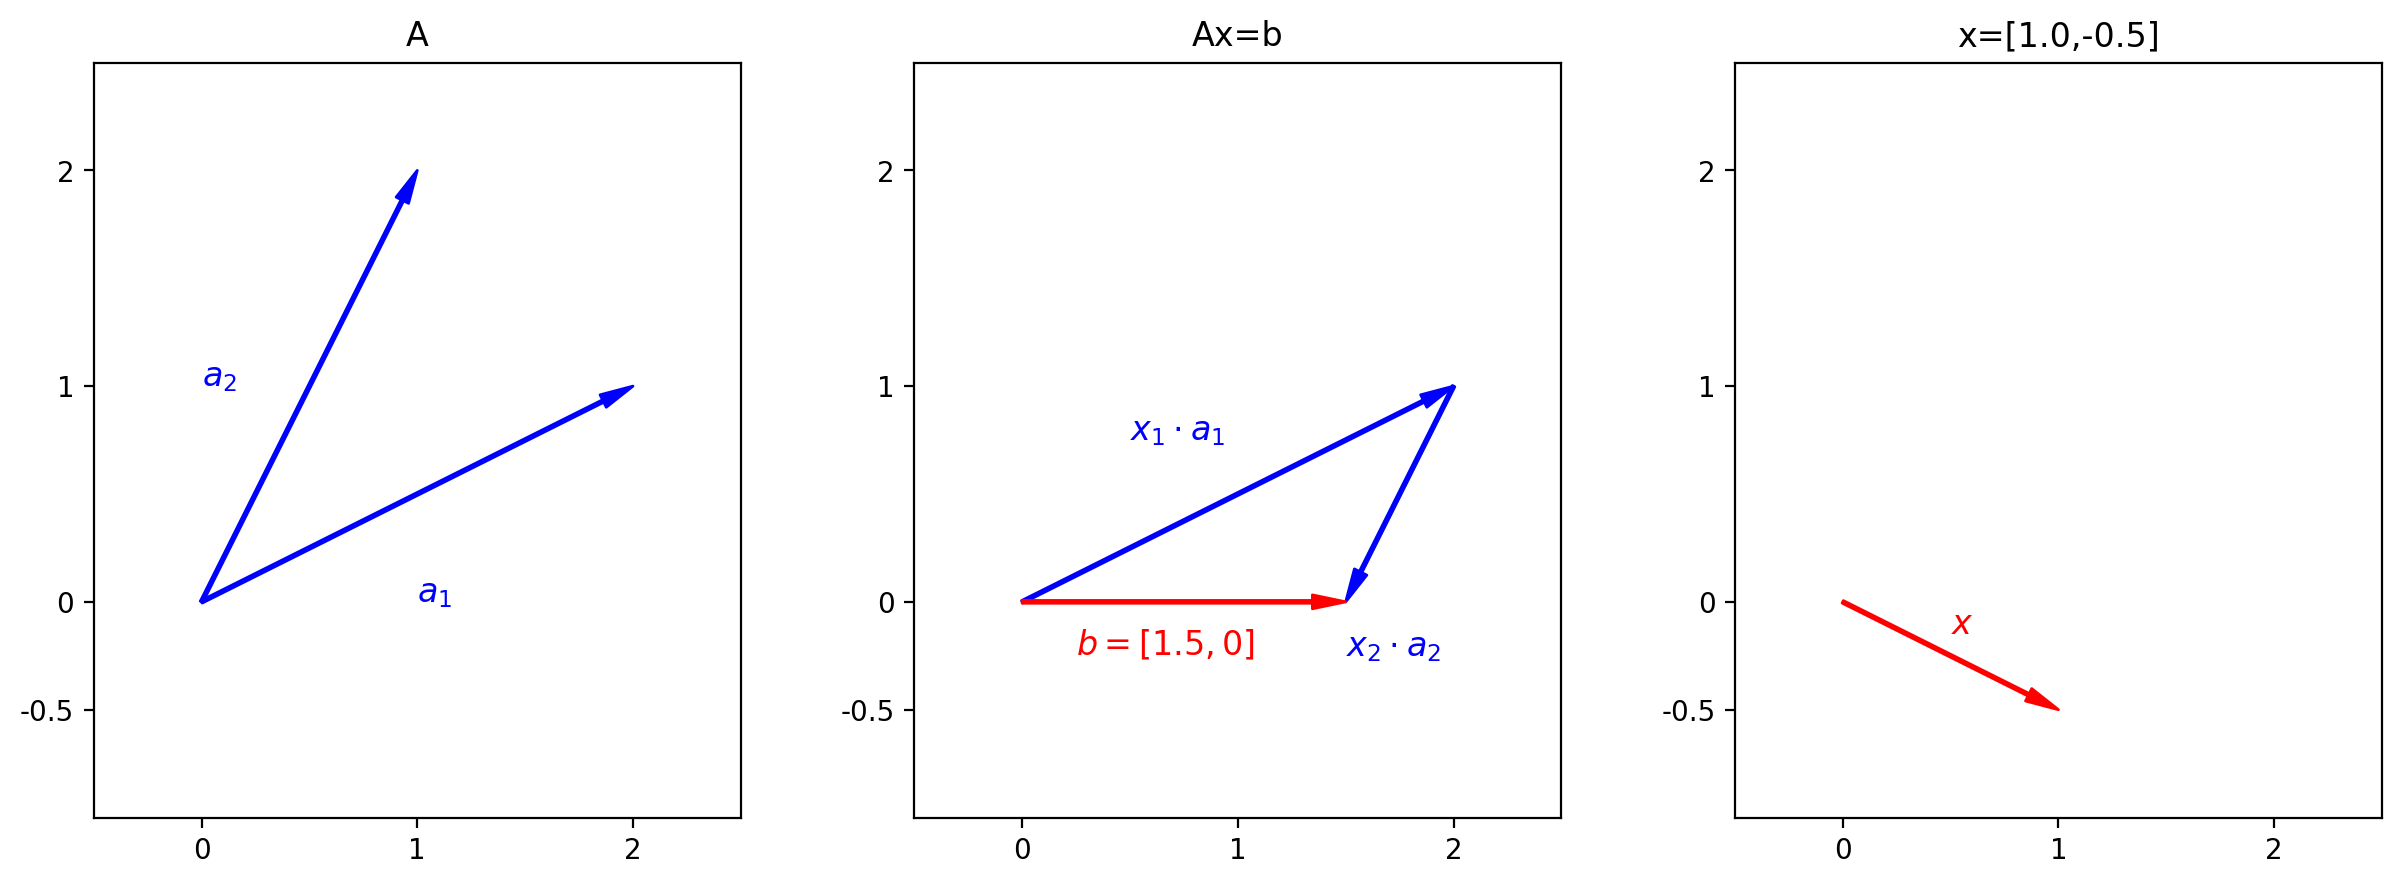

In [6]:
fig_vector

## Układ $n$ równań z $n$ niewiadomymi

$$\LARGE
\begin{array}{ccccccc}
a_{11}x_1 & + & a_{12}x_2  & + & \ldots & + & a_{1n}x_n & = & b_1\\
\\
a_{21}x_1 & + & a_{22}x_2 & + & \ldots & + & a_{2n}x_n & = & b_2\\
\\
\vdots &  & \vdots &  & \ddots &  & \vdots &  & \vdots\\
\\
a_{n1}x_1 & + & a_{n2}x_2 & + & \ldots & + & a_{nn}x_n & = & b_n
\end{array}
$$

## Postać macierzowa układu równań

$$\LARGE
\begin{bmatrix}
a_{11}&a_{12}&\ldots&a_{1n}\\
a_{21}&a_{22}&\ldots&a_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
a_{n1}&a_{n2}&\ldots&a_{nn}
\end{bmatrix}
\begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix}=
\begin{bmatrix}b_1\\b_2\\\vdots\\b_n\end{bmatrix}
$$

### lub w skrócie

$$\Huge \mathbf{Ax=b}$$

## Kiedy układ równań ma rozwiązanie?
### Twierdzenie Kronekera-Capelliego

Układ równań z $m$ niewiadomymi ma rozwiązanie wtedy i tylko wtedy gdy macierze $\mathbf{A}$ i $[\mathbf{A} | \mathbf{b}]$ mają ten sam rząd. Rozwiązanie jest unikalne gdy ten rząd wynosi $m$. W przeciwnym wypadku jest ich nieskończenie wiele.

## Konsekwencja TKC

 Warunkiem koniecznym i wystarczającym, aby układ $n$ równań z $n$ niewiadomymi (równanie macierzowe z kwadratową macierzą $\mathbf{A}$) miał jednoznaczne rozwiązanie to

 $$
 \Huge \mathrm{det}{\mathbf{A}}\neq0
 $$

## Jak policzyć wyznacznik?

- $\mathbf{A}\in\mathbb{R}^{2\times 2}$

$$
\mathbf{A}=\begin{bmatrix}a&b\\c&d\end{bmatrix} \quad\Rightarrow\quad \mathrm{det}{\mathbf{A}}=\left|\begin{matrix}a&b\\c&d\end{matrix}\right| = ad-bc
$$

- $\mathbf{A}\in\mathbb{R}^{3\times 3}$, tzw. schemat Sarrusa:

$$
\mathbf{A}=\begin{bmatrix}a&b&c\\d&e&f\\g&h&i\end{bmatrix} \quad\Rightarrow\quad \mathrm{det}{\mathbf{A}}=\left|\begin{matrix}a&b&c\\d&e&f\\g&h&i\end{matrix}\right| = aei+bfg+cdh-ceg-bdi-afh
$$


## Wyznacznik ogólnie

Wyznacznik definiuje się formalnie przez tzw. wzór Leibnitza

$$
\det(\mathbf{A}) = \sum_{\tau \in S_n} \mathrm{sgn}(\tau) \prod_{i = 1}^n a_{i, \, \tau(i)} = \sum_{\sigma \in S_n} \mathrm{sgn}(\sigma) \prod_{i = 1}^n a_{\sigma(i), \, i}
$$

$\tau$ i $\sigma$ są permutacjami ciągu $(1,\ 2,\ \ldots,\ n)$, należącego do zbioru wszystkich permutacji $S_n$. $\sigma(i)$ to i-ty element permutowanego ciągu.

Znak permutacji $\mathrm{sgn}(\sigma)$ to liczba zamian elementów oryginalnego ciągu miejscami aby uzyskać daną permutację. Jeżeli jest ona parzysta to wynosi 1, a nieparzysta to -1.

Wyliczanie z definicji wymaga od nas przeprowadzenia $O(n\cdot n!)$ mnożeń.


## Rozwinięcie Laplace'a


$$
\forall i,\ \det(\mathbf{A} ) = \sum_{j=1}^n (-1)^{i+j}a_{ij}M_{ij}
$$
gdzie $M_{ij}$ jest minorem (wyznacznikiem podmacierzy) powstałym przez wykreślenie $i$-tego wiersza i $j$-tej kolumny macierzy $\mathbf{A}$.

## Można implementować rekurencyjnie

Zlożoność obliczeniowa $O(n!)$

In [7]:
def determinant(M):
    # Base case of recursive function: 1x1 matrix

    if len(M) == 1: 
        return M[0][0]

    total = 0
    for column, element in enumerate(M[0,:]):
          # Exclude first row and current column.
        K = np.delete(M[1:,:],column,1)
        s = 1 if column % 2 == 0 else -1 
        total += s * element * determinant(K)
    return total

## Numeryczne wyliczanie wyznaczników

Przy numerycznym wyliczaniu korzysta się z następujących własności:

- $\det(\mathbf{A} ) = \prod_{i=1}^n a_{ii}$, wtedy, gdy $\mathbf{A}$ jest macierzą trójkątną 
- $\det(\mathbf{A} ) = \prod_{i=1}^n \sigma_i$, gdzie $\sigma_i$ są wartościami singularnymi macierzy $\mathbf{A}$
- $\det(\mathbf{A} ) = \prod_{i=1}^n \lambda_i$, gdzie $\lambda_i$ są wartościami własnymi macierzy $\mathbf{A}$

Macierz można przekształcić do trójkątnej (będziemy o tym mówić) w sposób dokładny. Wartości singularne i własne można wyliczyć jedynie w sposób przybliżony. Złożoność obliczeniowa każdej z metod jest na poziomie $O(n^3)$.

## Wzory Cramera - wyliczanie rozwiązania z wykorzystaniem wyznaczników

Dla układu 

$$\LARGE
\begin{bmatrix}
a_{11}&a_{11}&\ldots&a_{11}\\
a_{21}&a_{22}&\ldots&a_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
a_{n1}&a_{n2}&\ldots&a_{nn}
\end{bmatrix}
\begin{bmatrix}x_1\\x_2\\\vdots\\x_n\end{bmatrix}=
\begin{bmatrix}b_1\\b_2\\\vdots\\b_n\end{bmatrix}
$$

rozwiązanie wyraża się przez wzory 
$$
\huge x_i=\cfrac{\det{\mathbf{A}_i}}{\det{\mathbf{A}}}
$$

## Wzory Cramera - macierz $\mathbf{A}_i$

Macierz $\mathbf{A}_i$ powstaje przez zastąpienie $i$-tej kolumny macierzy $\mathbf{A}$ przez wektor $\mathbf{b}$ tzn:
$$
\Large\mathbf{A}_i=\begin{bmatrix}\mathbf{a}_1&\mathbf{a}_2&\ldots&\mathbf{a}_{i-1}&\mathbf{b}&\mathbf{a}_{i+1}&\ldots&\mathbf{a}_n\\\end{bmatrix}
$$



## Algorytm

In [8]:
import sys

def cramer(A,b,det_func):
    if A.shape[0]!=A.shape[1]:
        raise ValueError('Macierz nie jest kwadratowa tylko {} x {}'.format(A.shape[0],A.shape[1]))
    if A.shape[0]!=len(b):
        raise ValueError('Macierze A i b mają różne wymiary tj. {} i {}'.format(A.shape[0]!=len(b)))
    dtA = det_func(A)
    if np.abs(dtA)<sys.float_info.epsilon:
        raise ValueError('Macierz jest osobliwa lub bliska osobliwej, det(A)={}'.format(dtA))

    n=len(b)
    x = np.zeros(n)
    for i in range(n):
        A_i = A.copy()
        A_i[:,i]=b
        x[i] = det_func(A_i)/dtA
    return x


    

## Złożoność obliczeniowa wzorów Cramera

Potencjalnie przydatne w obliczeniach analitycznych 

Złożoność
- z rozwinięcie Laplace’a $O((n+1)!)$
- z numerycznym obliczaniem wyznacznika $O(n^4)$ 
 


In [14]:
n = 4
A = np.random.rand(n,n)
b = np.random.rand(n)

%timeit -r10 -n100 (cramer(A,b,determinant))
%timeit -r10 -n100 (cramer(A,b,np.linalg.det))

1.2 ms ± 38.7 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
36.6 µs ± 3.05 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


W obliczeniach numerycznych są lepsze metody